# Model Fitting -- Least Square Method

In [177]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

## UK

### Read data

In [178]:
T_uk = pd.read_csv('seroprevalence_uk.csv', header=None)
T_uk.columns = ['Age','Positive','Population']
T_uk['Seroprevalence'] = T_uk['Positive']/T_uk['Population']
T_uk.head()

,Age,Positive,Population,Seroprevalence
0,0.5,31,206,0.150485
1,1.5,30,146,0.205479
2,2.5,34,168,0.202381
3,3.5,57,189,0.301587
4,4.5,95,219,0.433790


### Initial guess

In [179]:
theta_0 = 0.12

z_uk = 1 - np.exp(-theta_0*T_uk['Age'])

LSM_error = sum((z_uk-T_uk['Seroprevalence'])**2)
LSM_error

0.10920847363077778

### Least square method

In [180]:
LSM_func_uk = lambda theta: sum(((1-np.exp(-theta*T_uk['Age']))-T_uk['Seroprevalence'])**2)
result = minimize(LSM_func_uk, theta_0, method='Nelder-Mead');
best_theta = result.x
best_theta

array([0.12225])

In [181]:
time_stamp = np.linspace(T_uk['Age'][0],T_uk['Age'][len(T_uk['Age'])-1],400)
y_uk = 1 - np.exp(-best_theta*time_stamp)

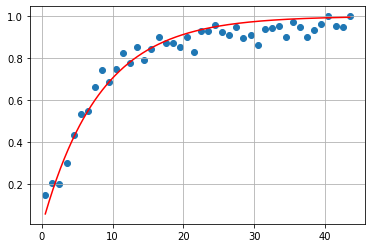

In [182]:
plt.scatter(T_uk['Age'],T_uk['Seroprevalence']);
plt.plot(time_stamp,y_uk,'r');
plt.grid()

### Average age at infection

In [183]:
A_uk = 1/best_theta
A_uk

array([8.1799591])

### Basic reproduction number

In [184]:
L = 60          # 60 years old
R0_uk = L/A_uk
R0_uk

array([7.335])

### Herd immunity thershold

In [185]:
H_uk = 1 - 1/R0_uk
H_uk

array([0.86366735])

## China


### Read data


In [186]:
T_ch = pd.read_csv('seroprevalence_china.csv', header=None)
T_ch.columns = ['Age','Positive','Population']
T_ch['Seroprevalence'] = T_ch['Positive']/T_ch['Population']
T_ch.head()


,Age,Positive,Population,Seroprevalence
0,0.5,264,766,0.344648
1,2.0,270,644,0.419255
2,3.0,371,652,0.569018
3,4.0,443,698,0.634670
4,5.0,532,723,0.735823


### Initial guess


In [187]:
theta_0 = 0.12

z_ch = 1 - np.exp(-theta_0*T_ch['Age'])

LSM_error = sum((z_ch-T_ch['Seroprevalence'])**2)
LSM_error


0.4483167576800016

### Least square method


In [188]:
LSM_func_ch = lambda theta: sum(((1-np.exp(-theta*T_ch['Age']))-T_ch['Seroprevalence'])**2)
result = minimize(LSM_func_ch, theta_0, method='Nelder-Mead');
best_theta = result.x
best_theta


array([0.27890625])

In [189]:
time_stamp = np.linspace(T_ch['Age'][0],T_ch['Age'][len(T_ch['Age'])-1],400)
y_ch = 1 - np.exp(-best_theta*time_stamp)


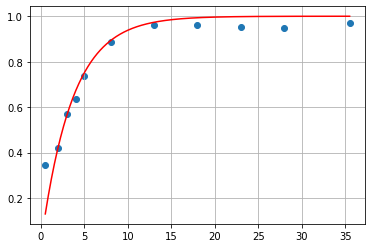

In [190]:
plt.scatter(T_ch['Age'],T_ch['Seroprevalence']);
plt.plot(time_stamp,y_ch,'r');
plt.grid()


### Average age at infection


In [191]:
A_ch = 1/best_theta
A_ch


array([3.58543417])

### Basic reproduction number


In [192]:
L = 60          # 60 years old
R0_ch = L/A_ch
R0_ch


array([16.734375])

### Herd immunity thershold


In [193]:
H_ch = 1 - 1/R0_ch
H_ch

array([0.94024276])

## First 6 month with maternal antibodies

### UK

In [194]:
maternal_uk = lambda theta : sum(((1-np.exp(-theta*(T_uk['Age']-0.5)))-T_uk['Seroprevalence'])**2)
result_m = minimize(maternal_uk, theta_0, method='Nelder-Mead');
best_theta_m = result_m.x
best_theta_m

array([0.1305])

In [195]:
time_stamp = np.linspace(T_uk['Age'][0],T_uk['Age'][len(T_uk['Age'])-1],400)
y_uk2 = 1 - np.exp(-best_theta_m*(time_stamp-0.5))

In [196]:
maternal_x = np.linspace(0,0.5,181)
maternal_y = np.linspace(1,y_uk2[0],181)

In [197]:
maternal_x[180]

0.5

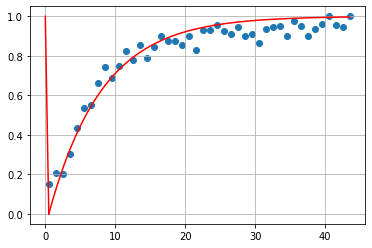

In [198]:
plt.scatter(T_uk['Age'],T_uk['Seroprevalence']);
plt.plot(maternal_x,maternal_y,'r');
plt.plot(time_stamp,y_uk2,'r')
plt.grid()

In [199]:
xx = np.concatenate(([0],T_uk['Age']))
yy = np.concatenate(([1],1 - np.exp(-best_theta_m*(T_uk['Age']-0.5))))

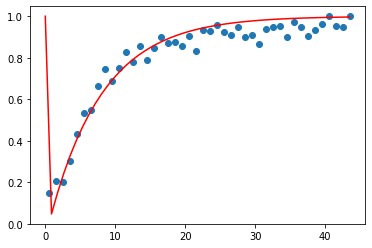

In [200]:
f = interp1d(xx,yy,kind='linear')
x_new = np.linspace(0,T_uk['Age'][len(T_uk['Age'])-1])
y_new = f(x_new)
plt.scatter(T_uk['Age'],T_uk['Seroprevalence']);
plt.plot(x_new,y_new,'r');

In [201]:
def maternal_fun(x):
    return np.exp(-2*x)

def maternal_uk_fun(x):
    y = 1 - np.exp(-best_theta_m*(x-0.5))
    return y

def fanning_func(x):
    sigma =  1. / (1 + np.exp(-(x-0.2) / 0.0051))
    f = (1-sigma) * maternal_fun(x) + sigma * maternal_uk_fun(x)
    return f

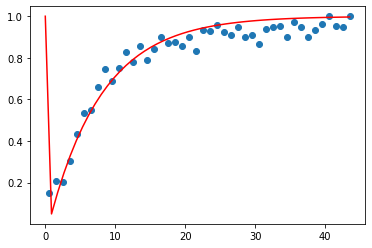

In [202]:
y_new = fanning_func(x_new)
plt.scatter(T_uk['Age'],T_uk['Seroprevalence']);
plt.plot(x_new,y_new,'r');